In [1]:
# importing dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# getting the labels-
labels_train= np.array(y_train).reshape(-1,1)
labels_test= np.array(y_test).reshape(-1,1)

In [4]:
# Using one hot encoding
onehot= OneHotEncoder()
onehot.fit(labels_train)
labels_train= onehot.fit_transform(labels_train).toarray()
labels_test= onehot.fit_transform(labels_test).toarray()

In [5]:
images_train = np.array(x_train).reshape(60000,28,28,1)/255
images_test = np.array(x_test).reshape(10000,28,28,1)/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [7]:
#using Sequential API
model_sql= Sequential()
model_sql.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1), padding='same')) # Number of filters, size of the filter, activation, input
model_sql.add(MaxPooling2D((2,2)))  # pool size
model_sql.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_sql.add(MaxPooling2D((2,2)))
model_sql.add(Conv2D(32,(3,3),activation='relu', padding='same'))
model_sql.add(MaxPooling2D((2,2)))

model_sql.add(Flatten())

model_sql.add(Dense(128,activation='relu'))     # hidden units, activation
model_sql.add(Dropout(0.2))  # dropout rate
model_sql.add(Dense(64,activation='relu'))
model_sql.add(Dropout(0.3))
model_sql.add(Dense(32,activation='relu'))
model_sql.add(Dropout(0.2))
model_sql.add(Dense(10,activation='softmax'))

model_sql.summary()
model_sql.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,938 (331.79 KB)

 Trainable params: 84,938 (331.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# using functional API
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input=Input(shape=(28,28,1))
conv1 = Conv2D(32,(3,3),activation='relu', padding='same')(input) # Number of filters, size of the filter, activation, input
pool1 = MaxPooling2D((2,2))(conv1) # pool size
conv2 = Conv2D(64,(3,3),activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(32,(3,3),activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2,2))(conv3)

flat = Flatten()(pool3)

dense1 = Dense(128,activation='relu')(flat)    # hidden units, activation
drop1 = Dropout(0.2)(dense1)  # dropout rate
dense2 = (Dense(64,activation='relu'))(drop1)
drop2 = Dropout(0.3)(dense2)
dense3 = Dense(32,activation='relu')(drop2)
drop3= Dropout(0.2)(dense3)
dense4= Dense(10,activation='softmax')(drop3)

model= Model(inputs= input, outputs= dense4)
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,938 (331.79 KB)

 Trainable params: 84,938 (331.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(images_train,labels_train,epochs=10,batch_size=1000, verbose=1,validation_data=(images_test,labels_test))

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3291 - loss: 1.8928 - val_accuracy: 0.8933 - val_loss: 0.4223
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8170 - loss: 0.5728 - val_accuracy: 0.9626 - val_loss: 0.1370
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9288 - loss: 0.2670 - val_accuracy: 0.9724 - val_loss: 0.0927
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9494 - loss: 0.1860 - val_accuracy: 0.9784 - val_loss: 0.0745
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9609 - loss: 0.1475 - val_accuracy: 0.9817 - val_loss: 0.0597
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9715 - loss: 0.1134 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9745 - loss: 0.1014 - val_accuracy: 0.9859 - val_loss: 0.0494
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9790 - loss: 0.0830 - val_accuracy: 0.9877 - val_lo

In [10]:
#saving the model
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5") # Changed the filename to end with .weights.h5

In [13]:
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [14]:
loaded_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,816 (995.38 KB)

 Trainable params: 84,938 (331.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,878 (663.59 KB)

In [15]:
p=loaded_model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [16]:
labels_predicted = np.argmax(p,1)

In [17]:
pd.crosstab(np.argmax(labels_test,axis = 1),labels_predicted)

col_0,0,4,7
row_0,,,
0,1,974,5
1,0,1135,0
2,0,1032,0
3,1,1009,0
4,0,982,0
5,2,890,0
6,0,958,0
7,0,1028,0
8,0,974,0


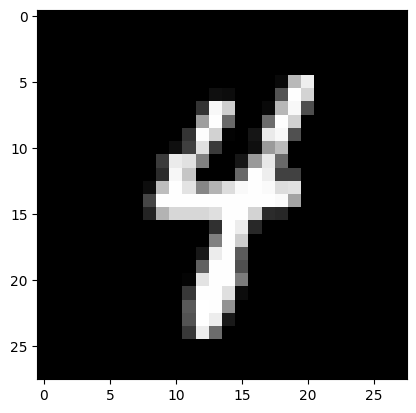

In [18]:
import matplotlib.pyplot as plt
ind = 7102
sample_image= images_test[ind,:,:,:]
pixels= sample_image.reshape((28,28,1))
plt.imshow(pixels, cmap='gray')
plt.show()

In [19]:
print(labels_predicted[ind])

4
